In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data uji kmeans.csv')

In [3]:
features = data[['Tinggi Badan', 'Berat Badan']].values

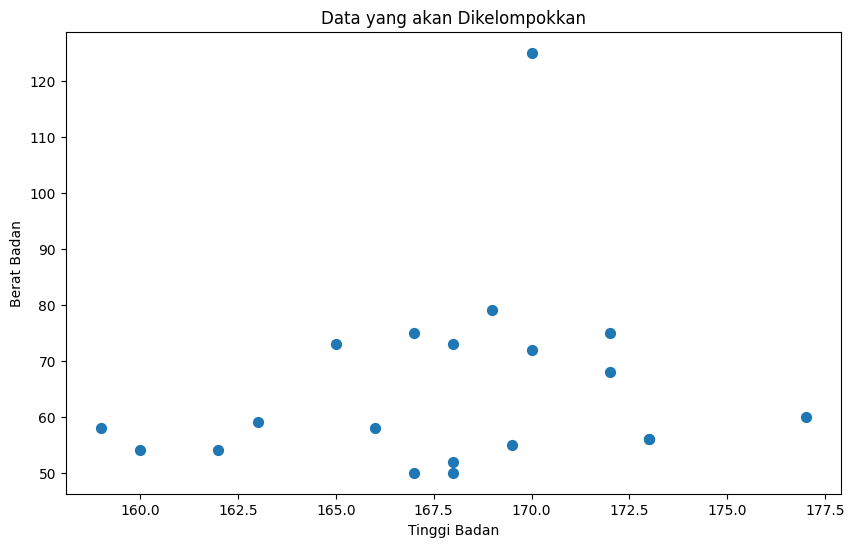

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 0], features[:, 1], s=50)
plt.title('Data yang akan Dikelompokkan')
plt.xlabel('Tinggi Badan')
plt.ylabel('Berat Badan')

plt.show()

In [23]:
k = 3  
np.random.seed(42)
random_indices = np.random.choice(features.shape[0], k, replace=False)
centroids = features[random_indices]

In [24]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [25]:
print("Centroid awal:")
print(centroids)

Centroid awal:
[[163.   59.   25.4 102.   68.   69.   23.   14.   74.   94. ]
 [173.   56.   17.9 120.    6.   97.   25.   14.   72.   88. ]
 [169.5  55.   15.2 112.   77.   70.   22.   14.   75.   92. ]]


In [26]:
def kmeans(features, centroids, max_iterations=100):
    for iteration in range(max_iterations):
        print(f"\nIterasi: {iteration + 1}")

        # 7.1. Mengelompokkan data berdasarkan jarak ke centroid
        clusters = []
        for point in features:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)  # Menemukan indeks centroid terdekat
            clusters.append(cluster_index)

        # 7.2. Memperbarui centroid
        new_centroids = np.zeros((k, features.shape[1]))
        for i in range(k):
            points_in_cluster = features[np.array(clusters) == i]
            if len(points_in_cluster) > 0:
                new_centroids[i] = np.mean(points_in_cluster, axis=0)  # Menghitung centroid baru

        # Menampilkan centroid baru
        print("Centroid baru:")
        print(new_centroids)

        # 7.3. Memeriksa konvergensi
        if np.all(centroids == new_centroids):
            print("Centroid tidak berubah. Proses konvergen.")
            break

        centroids = new_centroids  # Memperbarui centroid
        
        # 7.4. Visualisasi hasil iterasi
        plt.figure(figsize=(10, 6))
        plt.scatter(features[:, 0], features[:, 1], c=clusters, cmap='viridis', marker='o', label='Data')
        plt.scatter(new_centroids[:, 0], new_centroids[:, 1], s=300, c='red', label='Centroids', marker='X')
        plt.title(f'Hasil Kluster Iterasi {iteration + 1}')
        plt.xlabel('Tinggi Badan')
        plt.ylabel('Berat Badan')
        plt.legend()
        plt.show()

    return clusters, centroids



Iterasi: 1
Centroid baru:
[[168.57142857  77.85714286  28.57142857 112.          71.
   77.28571429  28.85714286  16.57142857  84.14285714 102.42857143]
 [173.          56.          17.9        120.           6.
   97.          25.          14.          72.          88.        ]
 [167.125       58.41666667  18.38333333 117.25        77.41666667
   78.75        24.          15.          72.83333333  90.75      ]]


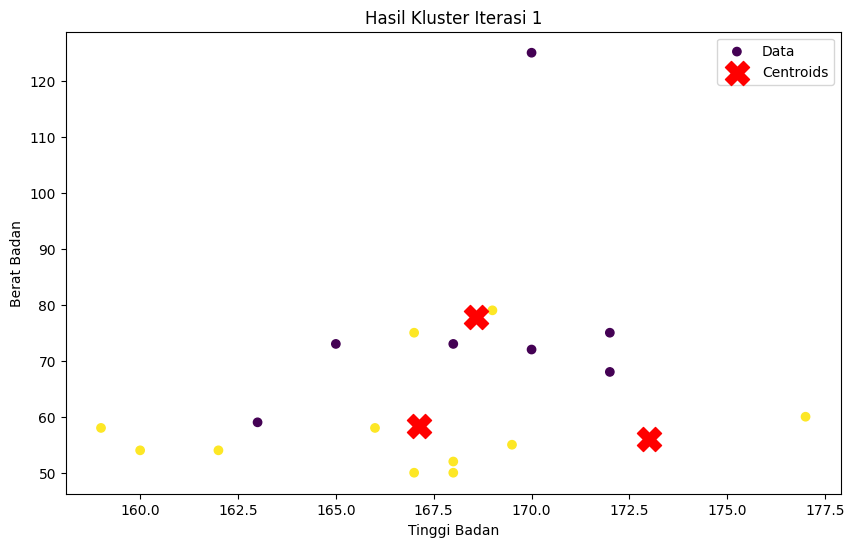


Iterasi: 2
Centroid baru:
[[169.125       80.          28.4125     116.375       73.25
   75.875       29.75        16.875       86.25       103.375     ]
 [173.          56.          17.9        120.           6.
   97.          25.          14.          72.          88.        ]
 [166.59090909  55.09090909  17.57272727 114.54545455  76.36363636
   79.90909091  22.90909091  14.63636364  70.27272727  89.        ]]


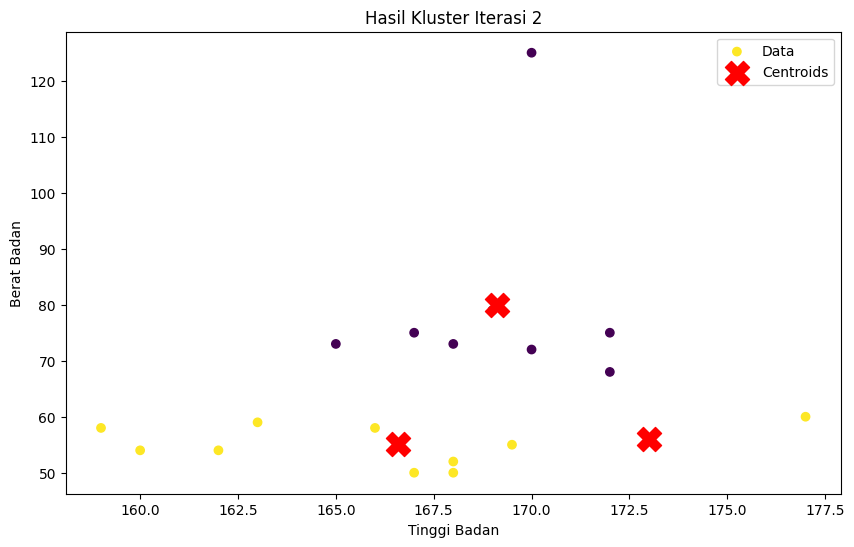


Iterasi: 3
Centroid baru:
[[169.125       80.          28.4125     116.375       73.25
   75.875       29.75        16.875       86.25       103.375     ]
 [173.          56.          17.9        120.           6.
   97.          25.          14.          72.          88.        ]
 [166.59090909  55.09090909  17.57272727 114.54545455  76.36363636
   79.90909091  22.90909091  14.63636364  70.27272727  89.        ]]
Centroid tidak berubah. Proses konvergen.


In [27]:
clusters, final_centroids = kmeans(features, centroids)

In [8]:
data['Cluster'] = clusters

In [15]:
print(data.head().to_string())

   Tinggi Badan  Berat Badan  % Lemak  Sistolik  Diastolik  Detak Jantung  Lengan Atas  Lengan Bawah  Lingkar Perut  Lingkar Panggul  Cluster
0         163.0           59     25.4       102         68             69           23            14             74               94        1
1         170.0          125     42.9       133         73             79           40            19            112              135        2
2         172.0           75     31.0       114         79             86           26            16             79              100        2
3         166.0           58     19.0       128         69             69           26            16             72               92        1
4         167.0           50     16.5       111         80             89           21            13             71               88        0
